In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cPickle as pickle
import multiprocessing
import scipy.special
import pandas as pd
import numpy as np
import numpy.fft as fft
import time
import os
import sys
sys.path.insert(1,'/Users/zyzdiana/GitHub/AC297r-Volume-Registration/code')

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# Get All Axes of Rotations
path = '/Users/zyzdiana/Dropbox/THESIS/July_15_2016_navs/'
ranges = ['0_5_to_2_5','3_0_to_5_0']
files = os.listdir(path)
axes_dict = {}
for f in files[1:]:
    rot_ax = f.split('_')[2]
    trans_ax = f.split('_')[10]
    if not axes_dict.has_key(rot_ax):
        axes_dict[rot_ax] = trans_ax
print axes_dict
print axes_dict.keys()

rot_axes = ['xz', 'y', 'yz', 'xy', 'x', 'z']
ax_to_idx = {}
for rot_ax in rot_axes:
    ax_to_idx[rot_ax] = rot_axes.index(rot_ax)
print ax_to_idx

{'xz': 'xy', 'y': 'z', 'yz': 'xy', 'xy': 'xy', 'x': 'z', 'z': 'z'}
['xz', 'y', 'yz', 'xy', 'x', 'z']
{'xy': 3, 'xz': 0, 'yz': 2, 'y': 1, 'x': 4, 'z': 5}


In [4]:
import plotly.plotly as py
from plotly.tools import FigureFactory as FF
import plotly.graph_objs as go

In [7]:
RMS_linear_oct13 = pickle.load(open('RMS_linear_oct13.p','rb'))
RMS_cubic_oct13 = pickle.load(open('RMS_cubic_oct13.p','rb'))
RMS_bspline_oct13 = pickle.load(open('RMS_bspline_oct13.p','rb'))

RMS_linear_june8 = pickle.load(open('RMS_linear_june8.p','rb'))
RMS_cubic_june8 = pickle.load(open('RMS_cubic_june8.p','rb'))
RMS_bspline_june8 = pickle.load(open('RMS_bspline_june8.p','rb'))

RMS_linear_july15 = pickle.load(open('RMS_linear_july15.p','rb'))
RMS_cubic_july15 = pickle.load(open('RMS_cubic_july15.p','rb'))
RMS_bspline_july15 = pickle.load(open('RMS_bspline_july15.p','rb'))

RMS_linear_july26 = pickle.load(open('RMS_linear_july26.p','rb'))
RMS_cubic_july26 = pickle.load(open('RMS_cubic_july26.p','rb'))
RMS_bspline_july26 = pickle.load(open('RMS_bspline_july26.p','rb'))

In [8]:
RMS_linear_oct13_2 = pickle.load(open('RMS_linear_oct13_2.p','rb'))
RMS_cubic_oct13_2 = pickle.load(open('RMS_cubic_oct13_2.p','rb'))
RMS_bspline_oct13_2 = pickle.load(open('RMS_bspline_oct13_2.p','rb'))

RMS_linear_june8_2 = pickle.load(open('RMS_linear_june8_2.p','rb'))
RMS_cubic_june8_2 = pickle.load(open('RMS_cubic_june8_2.p','rb'))
RMS_bspline_june8_2 = pickle.load(open('RMS_bspline_june8_2.p','rb'))

RMS_linear_july15_2 = pickle.load(open('RMS_linear_july15_2.p','rb'))
RMS_cubic_july15_2 = pickle.load(open('RMS_cubic_july15_2.p','rb'))
RMS_bspline_july15_2 = pickle.load(open('RMS_bspline_july15_2.p','rb'))

RMS_linear_july26_2 = pickle.load(open('RMS_linear_july26_2.p','rb'))
RMS_cubic_july26_2 = pickle.load(open('RMS_cubic_july26_2.p','rb'))
RMS_bspline_july26_2 = pickle.load(open('RMS_bspline_july26_2.p','rb'))

In [53]:
data_ls_1 = [RMS_bspline_oct13, RMS_bspline_june8, RMS_bspline_july26, RMS_bspline_july15, 
             RMS_cubic_oct13, RMS_cubic_june8, RMS_cubic_july26, RMS_cubic_july15,
             RMS_linear_oct13, RMS_linear_june8, RMS_linear_july26, RMS_linear_july15]
pickle.dump(data_ls_1, open('data_ls_1_plotly.p','wb'))

In [54]:
data_ls = [RMS_bspline_oct13_2, RMS_bspline_june8_2, RMS_bspline_july26_2, RMS_bspline_july15_2, 
           RMS_cubic_oct13_2, RMS_cubic_june8_2, RMS_cubic_july26_2, RMS_cubic_july15_2,
           RMS_linear_oct13_2, RMS_linear_june8_2, RMS_linear_july26_2, RMS_linear_july15_2]
pickle.dump(data_ls, open('data_ls_plotly.p','wb'))

In [5]:
data_ls = pickle.load(open('data_ls_plotly.p','rb'))
data_ls_1 = pickle.load(open('data_ls_1_plotly.p','rb'))

In [16]:
labels = ['10mm\nCubic\nB-spline','10mm\nTricubic','10mm\nTrilinear',
          '8mm\nCubic\nB-spline','8mm\nTricubic','8mm\nTrilinear',
          '6.4mm\nCubic\nB-spline','6.4mm\nTricubic','6.4mm\nTrilinear']

columns = ['Label','RMS','RMS_Rotation','RMS_Translation','Max_Dis','Max_Dis_R','RMS_trans_R','Iterations']
num_subject = 3

In [44]:
Labels_ls = []
for l in labels:
    for subj in xrange(1,num_subject+1):
        for j in xrange(420):
            Labels_ls.append(l+'\nsubject')
print len(Labels_ls)

Pineapple_label = []
for l in labels:
    for j in xrange(420):
        Pineapple_label.append(l+'\nPineapple')
print len(Pineapple_label)

11340
3780


In [45]:
subjects_df = pd.DataFrame(columns = columns)
subjects_df[columns[0]] = Labels_ls
for idx, col in enumerate(columns[1:]):
    col_vals = []
    for subj in xrange(num_subject):
        for res in [3,2,1]:
            for interp in xrange(3):
                col_vals += data_ls[interp*num_subject+subj][res+(idx*3)]
    subjects_df[col] = col_vals
    
pineapple_df = pd.DataFrame(columns = columns)
pineapple_df[columns[0]] = Pineapple_label
for idx, col in enumerate(columns[1:]):
    col_vals = []
    for res in [3,2,1]:
        for interp in xrange(3):
            col_vals += data_ls[interp*4+3][res+(idx*3)]
    pineapple_df[col] = col_vals

In [47]:
fig = FF.create_violin(subjects_df, data_header='RMS', group_header='Label', 
                       height=800, width=2800, title='RMS Error')
py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y1 ]  [ (1,3) x3,y1 ]  [ (1,4) x4,y1 ]  [ (1,5) x5,y1 ]  [ (1,6) x6,y1 ]  [ (1,7) x7,y1 ]  [ (1,8) x8,y1 ]  [ (1,9) x9,y1 ]



In [42]:
fig_pinapple = FF.create_violin(pineapple_df, data_header='Max_Dis', group_header='Label', 
                       height=800, width=800, title='Max Displacement')
py.iplot(fig_pinapple)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y1 ]  [ (1,3) x3,y1 ]  [ (1,4) x4,y1 ]  [ (1,5) x5,y1 ]  [ (1,6) x6,y1 ]  [ (1,7) x7,y1 ]  [ (1,8) x8,y1 ]  [ (1,9) x9,y1 ]



In [32]:
c= ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, 6)]
colors = []
for color in c:
    colors += [color]*70
    
xx = np.ones(420)

rot_axes = ['x','y','z','xy','yz','xz']
ax_labels = []
for ax in rot_axes:
    ax_labels += [ax]*70
labels = ['10mm\nCubic\nB-spline','10mm\nTricubic','10mm\nTrilinear',
          '8mm\nCubic\nB-spline','8mm\nTricubic','8mm\nTrilinear',
          '6.4mm\nCubic\nB-spline','6.4mm\nTricubic','6.4mm\nTrilinear']

In [37]:
def plotly_scatter(idx_ls, title, ylabel):
    l = []
    index = 1

    for idx in idx_ls:
        for ii, ls in enumerate(data_ls):
            subj_idx = (ii+1) % 4
            trace0= go.Scatter(
                x= ((xx * index) - 0.3) + (0.2*subj_idx),
                y= ls[idx],
                mode= 'markers',
                marker= dict(size= 14,
                            line= dict(width=1),
                            color= colors,#c[index-1],
                            opacity= 0.3
                           ),
                name= 'subject %s' % subj_idx,
                text= ax_labels) # The hover text goes here... 
            l.append(trace0);
            if(subj_idx) == 0:
                index += 1

    layout= go.Layout(
        title= title,
        hovermode= 'closest',
        xaxis= dict(
            title= '',
            ticklen= 5,
            zeroline= False,
            gridwidth= 2,
            ticktext = labels,
            tickvals = [1,2,3,4,5,6,7,8,9]
        ),
        yaxis=dict(
            title= ylabel,
            ticklen= 5,
            gridwidth= 2,
        ),
        showlegend= False
    )
    fig= go.Figure(data=l, layout=layout)
    return fig

In [38]:
fig = plotly_scatter([3,2,1], 'RMS error', 'RMS')
py.iplot(fig)

In [ ]:
fig = plotly_scatter([-1,-2,-3], 'Convergence', 'iterations')
py.iplot(fig)

In [39]:
fig = plotly_scatter([12,11,10], 'Maximum Displacement', 'Max')
py.iplot(fig)

In [52]:
# plotting quantiles
def error_plot_rotations_translations_2(figsize, r_idx_6_4, r_idx_8, r_idx_10, t_idx_6_4, t_idx_8, t_idx_10, RMS = True):
    colors = ['red','blue','green','orange','brown','purple']
    quantile_colors = ['blue','black','red','black','blue']
    y = np.arange(1,10)
    labels = ['10mm\nCubic\nB-spline','10mm\nTricubic','10mm\nTrilinear',
              '8mm\nCubic\nB-spline','8mm\nTricubic','8mm\nTrilinear',
              '6.4mm\nCubic\nB-spline','6.4mm\nTricubic','6.4mm\nTrilinear']
    
    plt.figure(figsize = figsize)
    
    plt.subplot(1,2,1)
    plt.yticks(y, labels, rotation='horizontal',fontsize=18)
    plt.xticks(fontsize=18)
    for idx, rot_ax in enumerate(['x','y','z','xy','yz','xz']):
        if rot_ax == 'x':
            label = 'x (LR/partition) rotation, z translation'
        elif rot_ax == 'y':
            label = 'y (AP/phase) rotation, z translation'
        elif rot_ax == 'z':
            label = 'z (HF/readout) rotation, z translation'
        else: 
            label = rot_ax + " rotation, xy translation"
        plt.scatter(-3, -3, lw=0,s = 150, c = colors[idx],alpha = 0.3,marker='o' , label=label)
    plt.plot([-4,-5],[-4,-5],lw=1,c='red',label='median')
    plt.plot([-4,-5],[-4,-5],lw=1,c='black',label='25%, 75% quantile')
    plt.plot([-4,-5],[-4,-5],lw=1,c='blue',label='5%, 95% quantile')
    
    idx = 1-0.2
    error_plot(RMS_bspline[r_idx_10],idx)
    plt.vlines(np.percentile(np.array(RMS_bspline[r_idx_10]),[5,25,50,75,95]),idx-0.16,idx+0.16,lw=1,color=quantile_colors)

    error_plot(RMS_bspline_oct13_2[r_idx_10],idx+0.4)
    plt.vlines(np.percentile(np.array(RMS_bspline_oct13_2[r_idx_10]),[5,25,50,75,95]),idx+0.4-0.16,idx+0.4+0.16,lw=1,color=quantile_colors)
    
    idx += 1 
    error_plot(RMS_cubic[r_idx_10],idx)
    plt.vlines(np.percentile(np.array(RMS_cubic[r_idx_10]),[5,25,50,75,95]),idx-0.16,idx+0.16,lw=1,color=quantile_colors)

    error_plot(RMS_cubic_oct13_2[r_idx_10],idx+0.4)
    plt.vlines(np.percentile(np.array(RMS_cubic_oct13_2[r_idx_10]),[5,25,50,75,95]),idx+0.4-0.16,idx+0.4+0.16,lw=1,color=quantile_colors)

    idx += 1
    error_plot(RMS_linear[r_idx_10],idx)
    plt.vlines(np.percentile(np.array(RMS_linear[r_idx_10]),[5,25,50,75,95]),idx-0.16,idx+0.16,lw=1,color=quantile_colors)

    error_plot(RMS_linear_oct13_2[r_idx_10],idx+0.4)
    plt.vlines(np.percentile(np.array(RMS_linear_oct13_2[r_idx_10]),[5,25,50,75,95]),idx+0.4-0.16,idx+0.4+0.16,lw=1,color=quantile_colors)

    idx += 1
    error_plot(RMS_bspline[r_idx_8],idx)
    plt.vlines(np.percentile(np.array(RMS_bspline[r_idx_8]),[5,25,50,75,95]),idx-0.16,idx+0.16,lw=1,color=quantile_colors)
  
    error_plot(RMS_bspline_oct13_2[r_idx_8],idx+0.4)
    plt.vlines(np.percentile(np.array(RMS_bspline_oct13_2[r_idx_8]),[5,25,50,75,95]),idx+0.4-0.16,idx+0.4+0.16,lw=1,color=quantile_colors)

    idx += 1
    error_plot(RMS_cubic[r_idx_8],idx)
    plt.vlines(np.percentile(np.array(RMS_cubic[r_idx_8]),[5,25,50,75,95]),idx-0.16,idx+0.16,lw=1,color=quantile_colors)

    error_plot(RMS_cubic_oct13_2[r_idx_8],idx+0.4)
    plt.vlines(np.percentile(np.array(RMS_cubic_oct13_2[r_idx_8]),[5,25,50,75,95]),idx+0.4-0.16,idx+0.4+0.16,lw=1,color=quantile_colors)

    idx += 1
    error_plot(RMS_linear[r_idx_8],idx)
    plt.vlines(np.percentile(np.array(RMS_linear[r_idx_8]),[5,25,50,75,95]),idx-0.16,idx+0.16,lw=1,color=quantile_colors)

    error_plot(RMS_linear_oct13_2[r_idx_8],idx+0.4)
    plt.vlines(np.percentile(np.array(RMS_linear_oct13_2[r_idx_8]),[5,25,50,75,95]),idx+0.4-0.16,idx+0.4+0.16,lw=1,color=quantile_colors)

    idx += 1
    error_plot(RMS_bspline[r_idx_6_4],idx)
    plt.vlines(np.percentile(np.array(RMS_bspline[r_idx_6_4]),[5,25,50,75,95]),idx-0.16,idx+0.16,lw=1,color=quantile_colors)
 
    error_plot(RMS_bspline_oct13_2[r_idx_6_4],idx+0.4)
    plt.vlines(np.percentile(np.array(RMS_bspline_oct13_2[r_idx_6_4]),[5,25,50,75,95]),idx+0.4-0.16,idx+0.4+0.16,lw=1,color=quantile_colors)

    idx += 1
    error_plot(RMS_cubic[r_idx_6_4],idx)
    plt.vlines(np.percentile(np.array(RMS_cubic[r_idx_6_4]),[5,25,50,75,95]),idx-0.16,idx+0.16,lw=1,color=quantile_colors)

    error_plot(RMS_cubic_oct13_2[r_idx_6_4],idx+0.4)
    plt.vlines(np.percentile(np.array(RMS_cubic_oct13_2[r_idx_6_4]),[5,25,50,75,95]),idx+0.4-0.16,idx+0.4+0.16,lw=1,color=quantile_colors)

    idx += 1
    error_plot(RMS_linear[r_idx_6_4],idx)
    plt.vlines(np.percentile(np.array(RMS_linear[r_idx_6_4]),[5,25,50,75,95]),idx-0.16,idx+0.16,lw=1,color=quantile_colors)

    error_plot(RMS_linear_oct13_2[r_idx_6_4],idx+0.4)
    plt.vlines(np.percentile(np.array(RMS_linear_oct13_2[r_idx_6_4]),[5,25,50,75,95]),idx+0.4-0.16,idx+0.4+0.16,lw=1,color=quantile_colors)
    
    plt.vlines(0,0,7,color = 'r',lw=1,linestyle='--')
    plt.ylim([0.5,9.5])
    plt.legend(loc='center left', bbox_to_anchor=(-0.28, 1.13), ncol=2, scatterpoints=1,fontsize = 20)
    #plt.title('Rotation RMS',fontsize = 20)
    if(RMS):
        plt.xlim([0,1])
        plt.xlabel('Rotation Error (degrees)',fontsize=20)
    else:
        plt.xlim([0,1.0])
        plt.xlabel('Maximum displacement\ndue to rotation (mm)',fontsize=20)
    plt.grid('off')

    plt.subplot(1,2,2)
    plt.yticks([])
    plt.xticks(fontsize=18)
    
    idx = 1
    error_plot(RMS_bspline[t_idx_10],idx)
    plt.vlines(np.percentile(np.array(RMS_bspline[t_idx_10]),[5,25,50,75,95]),idx-0.16,idx+0.16,lw=1,color=quantile_colors)

    error_plot(RMS_bspline_oct13_2[t_idx_10],idx+0.4)
    plt.vlines(np.percentile(np.array(RMS_bspline_oct13_2[t_idx_10]),[5,25,50,75,95]),idx+0.4-0.16,idx+0.4+0.16,lw=1,color=quantile_colors)

    idx += 1 
    error_plot(RMS_cubic[t_idx_10],idx)
    plt.vlines(np.percentile(np.array(RMS_cubic[t_idx_10]),[5,25,50,75,95]),idx-0.16,idx+0.16,lw=1,color=quantile_colors)

    error_plot(RMS_cubic_oct13_2[t_idx_10],idx+0.4)
    plt.vlines(np.percentile(np.array(RMS_cubic_oct13_2[t_idx_10]),[5,25,50,75,95]),idx+0.4-0.16,idx+0.4+0.16,lw=1,color=quantile_colors)

    idx += 1
    error_plot(RMS_linear[t_idx_10],idx)
    plt.vlines(np.percentile(np.array(RMS_linear[t_idx_10]),[5,25,50,75,95]),idx-0.16,idx+0.16,lw=1,color=quantile_colors)

    error_plot(RMS_linear_oct13_2[t_idx_10],idx+0.4)
    plt.vlines(np.percentile(np.array(RMS_linear_oct13_2[t_idx_10]),[5,25,50,75,95]),idx+0.4-0.16,idx+0.4+0.16,lw=1,color=quantile_colors)
    
    idx += 1
    error_plot(RMS_bspline[t_idx_8],idx)
    plt.vlines(np.percentile(np.array(RMS_bspline[t_idx_8]),[5,25,50,75,95]),idx-0.16,idx+0.16,lw=1,color=quantile_colors)
 
    error_plot(RMS_bspline_oct13_2[t_idx_8],idx+0.4)
    plt.vlines(np.percentile(np.array(RMS_bspline_oct13_2[t_idx_8]),[5,25,50,75,95]),idx+0.4-0.16,idx+0.4+0.16,lw=1,color=quantile_colors)

    idx += 1
    error_plot(RMS_cubic[t_idx_8],idx)
    plt.vlines(np.percentile(np.array(RMS_cubic[t_idx_8]),[5,25,50,75,95]),idx-0.16,idx+0.16,lw=1,color=quantile_colors)

    error_plot(RMS_cubic_oct13_2[t_idx_8],idx+0.4)
    plt.vlines(np.percentile(np.array(RMS_cubic_oct13_2[t_idx_8]),[5,25,50,75,95]),idx+0.4-0.16,idx+0.4+0.16,lw=1,color=quantile_colors)

    idx += 1
    error_plot(RMS_linear[t_idx_8],idx)
    plt.vlines(np.percentile(np.array(RMS_linear[t_idx_8]),[5,25,50,75,95]),idx-0.16,idx+0.16,lw=1,color=quantile_colors)

    error_plot(RMS_linear_oct13_2[t_idx_8],idx+0.4)
    plt.vlines(np.percentile(np.array(RMS_linear_oct13_2[t_idx_8]),[5,25,50,75,95]),idx+0.4-0.16,idx+0.4+0.16,lw=1,color=quantile_colors)

    idx += 1
    error_plot(RMS_bspline[t_idx_6_4],idx)
    plt.vlines(np.percentile(np.array(RMS_bspline[t_idx_6_4]),[5,25,50,75,95]),idx-0.16,idx+0.16,lw=1,color=quantile_colors)
 
    error_plot(RMS_bspline_oct13_2[t_idx_6_4],idx+0.4)
    plt.vlines(np.percentile(np.array(RMS_bspline_oct13_2[t_idx_6_4]),[5,25,50,75,95]),idx+0.4-0.16,idx+0.4+0.16,lw=1,color=quantile_colors)

    idx += 1
    error_plot(RMS_cubic[t_idx_6_4],idx)
    plt.vlines(np.percentile(np.array(RMS_cubic[t_idx_6_4]),[5,25,50,75,95]),idx-0.16,idx+0.16,lw=1,color=quantile_colors)

    error_plot(RMS_cubic_oct13_2[t_idx_6_4],idx+0.4)
    plt.vlines(np.percentile(np.array(RMS_cubic_oct13_2[t_idx_6_4]),[5,25,50,75,95]),idx+0.4-0.16,idx+0.4+0.16,lw=1,color=quantile_colors)

    idx += 1
    error_plot(RMS_linear[t_idx_6_4],idx)
    plt.vlines(np.percentile(np.array(RMS_linear[t_idx_6_4]),[5,25,50,75,95]),idx-0.16,idx+0.16,lw=1,color=quantile_colors)

    error_plot(RMS_linear_oct13_2[t_idx_6_4],idx+0.4)
    plt.vlines(np.percentile(np.array(RMS_linear_oct13_2[t_idx_6_4]),[5,25,50,75,95]),idx+0.4-0.16,idx+0.4+0.16,lw=1,color=quantile_colors)
    
    plt.vlines(0,0,7,color = 'r',lw=1,linestyle='--')
    if(RMS):
        plt.xlim([0,1])
        plt.xlabel('Translation Error (mm)',fontsize=20)
    else:
        plt.xlim([0,1.0])
        plt.xlabel('RMS displacemnt\ndue to rotation (mm)',fontsize=20)
    plt.ylim([0.5,9.5])
    plt.grid('off')
    
    plt.show()

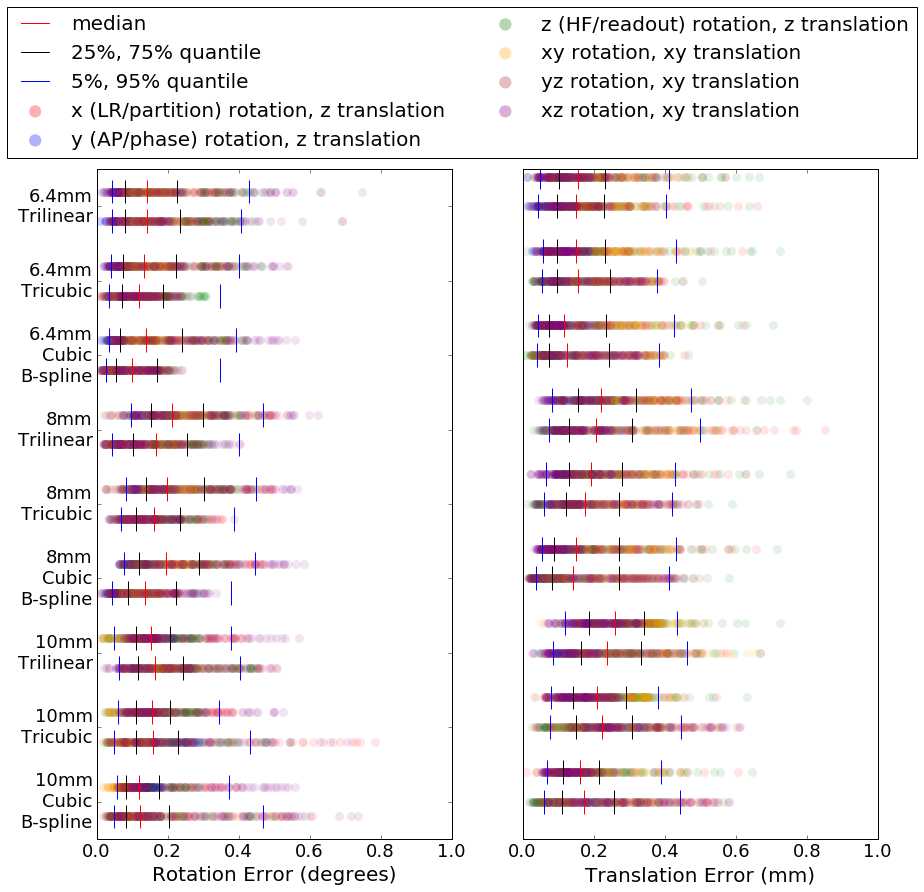

In [56]:
error_plot_rotations_translations_2([14,12], 4, 5, 6, 7, 8, 9, True)

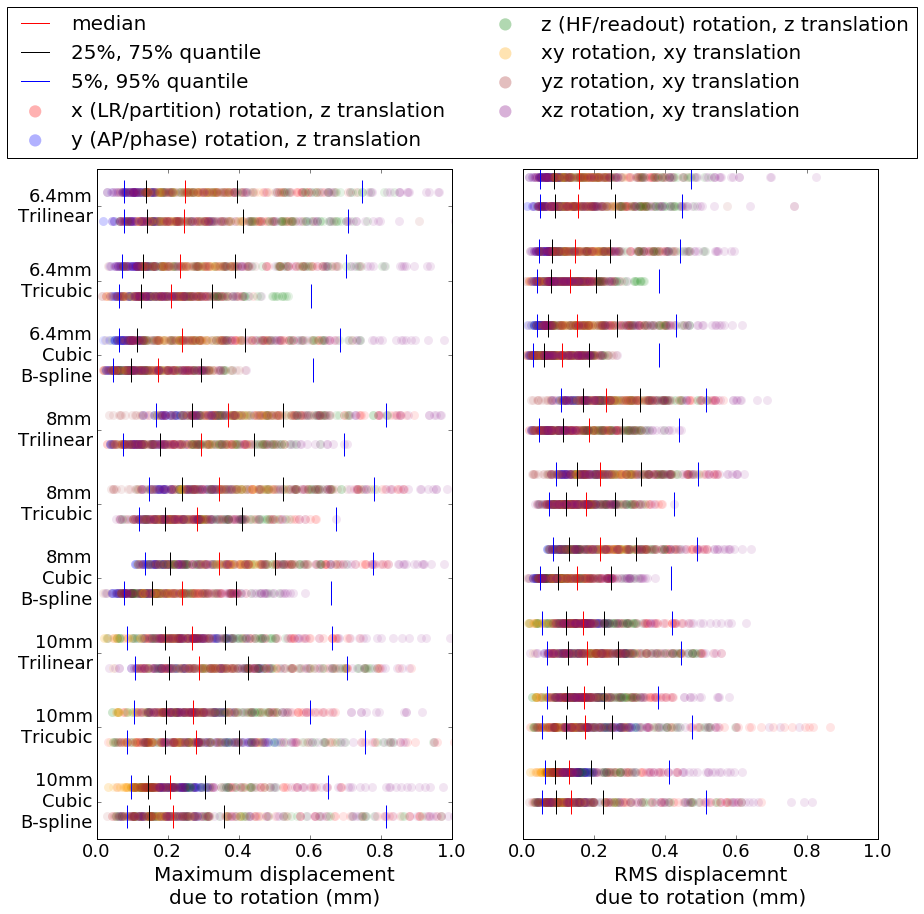

In [54]:
error_plot_rotations_translations_2([14,12], 13, 14, 15, 16, 17, 18, False)

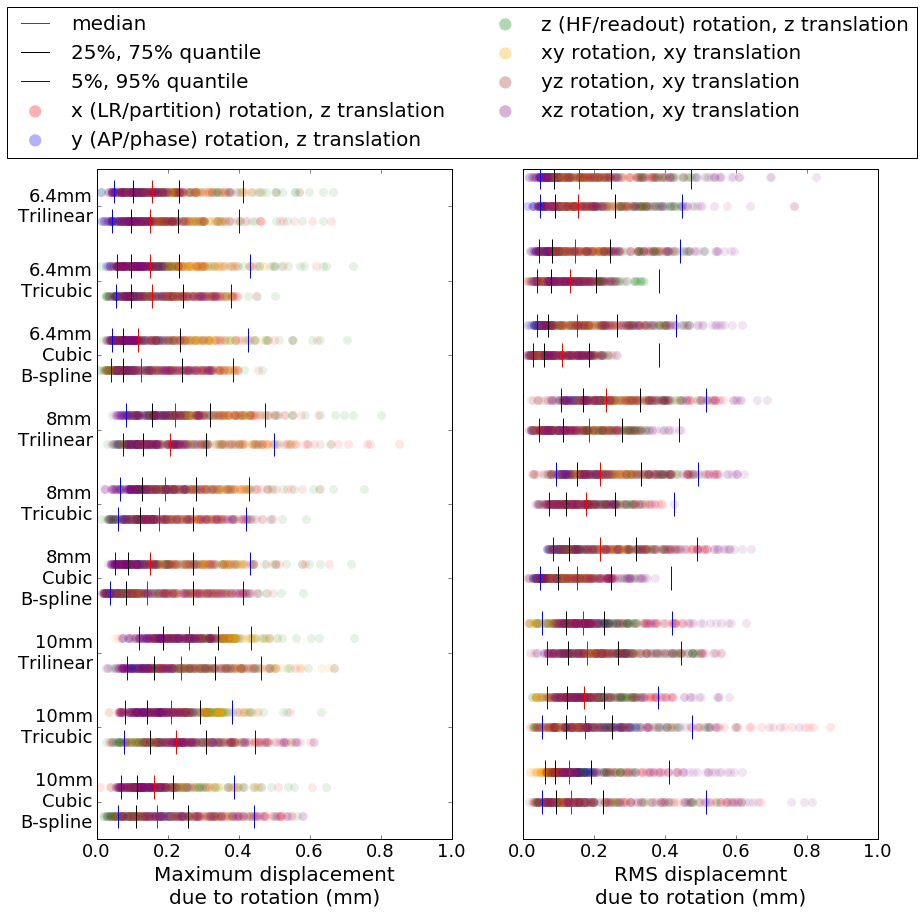

In [55]:
error_plot_rotations_translations_2([14,12], 7, 8, 9, 16,17,18, False)